In [1]:

import numpy as np 
import matplotlib.pyplot as plt 
import math 
import random 

In [580]:
categories = np.linspace(0.001, 8, 101)
probabilities = np.absolute(np.random.normal(0, 1, size=categories.size))
probabilities = probabilities / probabilities.sum() 

def categorical_probability(x, w):
    return w[x]

def multinomial_coefficient(N, counts): 
    
    numerator = np.math.factorial(N)
    
    denominator = 1 
    for k in counts: 
        denominator *= np.math.factorial(k)

    return numerator / denominator

counts = np.random.randint(0, 5, size=categories.shape)
N = np.sum(counts) 

def poisson_distrib(K, lmb):
    return np.exp(-lmb) * (lmb**K) / math.factorial(K) 

def neg_binomial(x, r, p): 
    norm = math.factorial(x + r) / (math.factorial(x) * math.factorial(r)) 
    expectation = norm * (1-p)**r * p**x 
    return expectation

def normal_distribution(x, mu, sigma): 
    normalisation_factor = 1 / np.sqrt(2 * np.pi * sigma)
    return normalisation_factor * np.exp(- (1/2) * ((x-mu) / (sigma))**2)

def beta_function(a, b):
    return (math.gamma(a) + math.gamma(b)) / math.gamma(a+b)

def student_distribution(x, v, mu, sigma): 
    z = np.sqrt(v) * sigma * beta_function(0.5, (v/2)) 
    exponent = -((v+1)/2)
    distance = ((x-mu) / sigma)**2
    p = (1/z) * (1 + (1/v) * distance) ** exponent 
    return p 


def laplace_distribution(x, mu, b):
    return 1/(2 * b) * np.exp((-(abs(x-mu))/b))


def gamma_distribution(x, a, b): 
    return ((b**a) / math.gamma(a)) * (x**(a-1)) * np.exp(- (x * b))

def inverse_gamme(x, a, b):
    return ((b**a) / math.gamma(a)) * (x**-(a+1)) * np.exp(-(b / x))

def pareto_distribution(x, k, m):
    y = np.zeros(shape=x.shape)
    indices = np.where(x >= m, True, False)
    y[indices] = k * m ** k * (1 / x[indices]**(k+1)) 
    return y

def unit_norm(v: np.array): 
    return v / v.sum() 

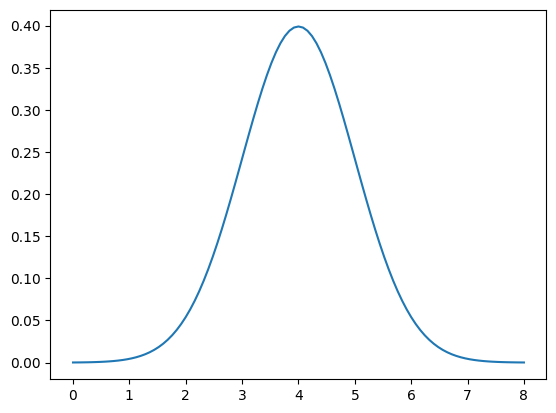

In [423]:
plt.close()
y = normal_distribution(categories, 4, 1)
plt.plot(categories, y)

In [748]:
def markov_transition_matrix(K):
    A = np.abs(np.random.normal(0, 1, size=(K, K))) 
    A = A.T / np.sum(A, axis=1)
    return A.T

K = 4 
A = markov_transition_matrix(K + 1)
states = np.linspace(0, K, K+1).astype(int)
init_state = random.choice(states)

steps = 10 
repeats = 3 
sequences = np.zeros(shape=(3, steps), dtype=int)
for r in range(repeats): 
    for n in range(steps):
        if n == 0: 
            state = np.random.choice(states, p=unit_norm(A.sum(axis=0)))
        else: 
            state = np.random.choice(states, p=A[state])    
        
        sequences[r, n] = state 


def likelihood_at_index(prior_state, posterior_state, A): 
    if posterior_state is None: 
        return unit_norm(A.sum(axis=0))[prior_state] 
    else: 
        return A[prior_state, posterior_state]

def sequence_log_likelihood(sequence, A): 
    log_likelihood = 0 
    for step, state in enumerate(sequence):
        if step == 0:
            log_likelihood += np.log(likelihood_at_index(state, None, A))
        else:
            log_likelihood += np.log(likelihood_at_index(sequence[step-1], sequence[step], A)) 
    
    return log_likelihood 

def dataset_log_likelihood(sequences, A): 
    init_states = np.zeros(shape=A.shape[0])
    states = np.zeros(shape=A.shape) 

    test_ll = 0 
    for sequence in sequences: 
        init_states[sequence[0]] += 1 
        test_ll += sequence_log_likelihood(sequence, A)
        
        for i in range(1, len(sequence)):
            prior_state = sequence[i - 1]
            posterior_state = sequence[i]
        
            states[prior_state, posterior_state] += 1 
    
    log_likelihood = 0
    for i in range(A.shape[0]):
        log_likelihood += init_states[i] * np.log(likelihood_at_index(i, None, A)) 

    for i in range(A.shape[0]): 
        for j in range(A.shape[1]): 
            log_likelihood += states[i, j] * np.log(likelihood_at_index(i, j, A))
        

    return log_likelihood, test_ll 


log_likelihood_1, test_ll = dataset_log_likelihood(sequences, A)
print(log_likelihood_1, test_ll)

-39.68227179885944 -39.68227179885945


In [747]:
for i in len(A): 
    print(A)

TypeError: 'int' object is not iterable